<a href="https://colab.research.google.com/github/jrhoads35/navProject/blob/main/lostinspace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib
!pip install numpy
!pip install pandas
!pip install skyfield

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 446.0/446.0 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.1/232.1 kB 19.7 MB/s eta 0:00:00


In [ ]:
import matplotlib
import numpy as np
import math

Solve the lost in space problem

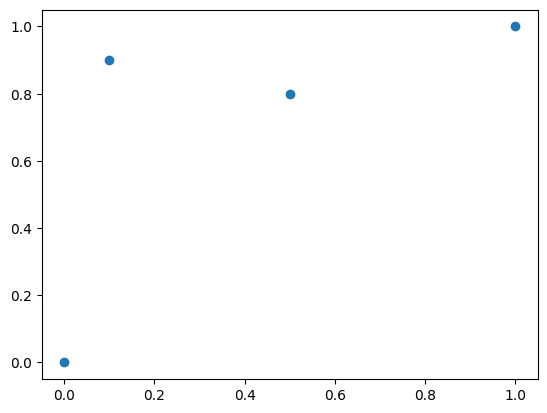

In [ ]:
# Find area of a quadrilateral

a = [1,1]
b = [.1, .9]
c = [0,0]
d = [.5,.8]

coord_plot = [[a[0], b[0], c[0], d[0]], [a[1], b[1], c[1], d[1]]]


matplotlib.pyplot.scatter(coord_plot[0], coord_plot[1])



In [ ]:
# area of any quad using shoelace method
# https://en.wikipedia.org/wiki/Shoelace_formula

n = 4
A_2 = 0
x = coord_plot[0]
y = coord_plot[1]
for i in range(n):
  if i >= 3:
    i_1 = 0
  else:
    i_1 = i+1

  A_2 += (x[i]*y[i_1]) - (y[i]*x[i_1])

A = A_2/2
print(A)

0.25


Loading in stars w starfield and hipparcos catalog

In [ ]:
from skyfield.api import Star, load
from skyfield.data import hipparcos

with load.open(hipparcos.URL) as f:
    df = hipparcos.load_dataframe(f)

df = df[df['ra_degrees'].notnull()]
df = df[df['magnitude'] <= 10]

decRange = 2
raRange = 2

raCenter = 188
decCenter = 14.45

df = df[df['ra_degrees'] > raCenter - raRange]
df = df[df['ra_degrees'] < raCenter + raRange]
df = df[df['dec_degrees'] < decCenter + decRange]
df = df[df['dec_degrees'] > decCenter - decRange]





Idea is to project the stars onto a 2d page from sterograph to cartesian

https://astronomy.stackexchange.com/questions/35882/how-to-make-projection-from-altitude-and-azimuth-to-screen-with-screen-coordinat

https://astronomy.stackexchange.com/questions/43449/plotting-equatorial-coordinates-to-x-y-plane-simulating-telescope-camera-view

In [ ]:
df

,magnitude,ra_degrees,dec_degrees,parallax_mas,ra_mas_per_year,dec_mas_per_year,ra_hours,epoch_year
hip,,,,,,,,
60566,8.09,186.226922,16.194781,4.17,-24.25,3.91,12.415128,1991.25
60621,8.21,186.364518,16.171420,2.98,-9.57,-10.77,12.424301,1991.25
60672,6.74,186.513660,15.863918,4.35,-0.08,9.88,12.434244,1991.25
60705,8.04,186.624703,14.572019,2.15,-29.80,-6.56,12.441647,1991.25
60738,8.89,186.721654,14.043870,4.11,-10.11,-31.88,12.448110,1991.25
60803,9.63,186.923414,14.257840,10.34,-223.79,108.29,12.461561,1991.25
60836,8.59,187.044916,15.618490,6.92,-16.75,19.06,12.469661,1991.25
60838,8.80,187.048860,15.252498,0.75,29.55,-8.07,12.469924,1991.25
60896,9.41,187.199490,13.088000,4.26,4.95,-23.66,12.479966,1991.25


In [ ]:
ra_arr = []
dec_arr = []
star_arr = []


for ind in df.index:
  star = df.loc[ind]
  ra = star.ra_degrees*math.pi/180
  dec = star.dec_degrees*math.pi/180
  star_arr.append(ind)
  ra_arr.append(ra)
  dec_arr.append(dec)





NEED TO REVIEW THIS TRANSFORMATION

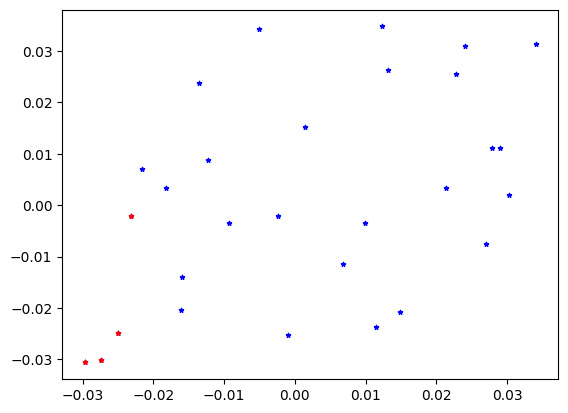

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

s_dec = dec_arr
s_ra = ra_arr

c_dec = np.tile(np.array(((decCenter))*(math.pi/180)),len(s_dec))

c_ra = np.tile(np.array(((raCenter))*(math.pi/180)), len(s_ra))


stdX = np.cos(s_dec) * np.sin(s_ra - c_ra) / (np.cos(c_dec) * np.cos(s_dec) * np.cos(s_ra - c_ra) + np.sin(c_dec) * np.sin(s_dec))
stdY = (np.sin(c_dec) * np.cos(s_dec) * np.cos(s_ra - c_ra) - np.cos(c_dec) * np.sin(s_dec)) / (np.cos(c_dec) * np.cos(s_dec) * np.cos(s_ra - c_ra) + np.sin(c_dec) * np.sin(s_dec))

plt.scatter(stdX, stdY, marker='*', color='blue', s=10)

plt.scatter(stdX[0:4], stdY[0:4], marker='*', color='red', s=10)



plt.show()

notes to build quads:
- want to use brightest stars as they are easier to detect
- do not use the same bright star too may time (what #?) becasue if it is not detected
-

In [ ]:
import itertools


def toStar(x,y, star_loc):
  star_arr = []
  for k,x_i in enumerate(x):
    star = (x_i,stdY[k], star_loc[k])
    star_arr.append(star)

  stars = np.array(star_arr, dtype = 'f')
  return stars


def distance(cord):

  return math.sqrt(cord[0]**2 + cord[1]**2)


def norm(vect):
  tot = 0
  for num in vect:
    tot += num**2
  return math.sqrt(tot)

def findBstar(starList):
  maxDist = 0
  farStar = 0

  for k,star in enumerate(starList):
    tempDist = distance(star[0:2])
    if tempDist > maxDist:
      maxDist = tempDist
      farStar = k

  if farStar == 0:
    print("Error no far star found")
    return -1

  return farStar

def findFarthest(starList):
  combos = itertools.combinations([0,1,2,3],2)
  distMax = -1
  farCombo = (-1,-1)
  for combo in combos:
    dist = distance(starList[combo[0]] - starList[combo[1]])
    if dist > distMax:
      distMax = dist
      farCombo = combo

  return farCombo


def transformCord(starList):
  """
  starList:: np-arr :
    list of four star tuples the first star is the a star

  outStars:: np-arr:
    list of stars that have new coordinate systems where a star is (0,0)
    b star is (1,1)
    c/d are defined wrt a/b

    this is irrespective of the orinetation and is a local coordinate frame

  """
  starList = np.array(starList)

  ind = [0,1,2,3]

  abInd = findFarthest(starList)
  aInd = int(abInd[0])

  bInd = int(abInd[1])
  ind.remove(aInd)

  ind.remove(bInd)


  starList[:,0:2] = starList[:,0:2] - starList[aInd,0:2]


  aOut = starList[aInd]
  #bInd  = int(findBstar(starList))
  if bInd == -1:

    print("TRANSFORMATION ERROR")
    return []
  b = starList[bInd]



  #bNorm = distance(b)
  bOut = b
  bOut[0:2] = b[0:2]/b[0:2]
  if starList[ind[0]][0] / b[0] < starList[ind[1]][0] / b[0]:
    cOut = starList[ind[0]]
    cOut[0:2] = cOut[0:2]/b[0:2]
    dOut = starList[ind[1]]
    dOut[0:2] = dOut[0:2]/b[0:2]
  else:
    cOut = starList[ind[1]]
    cOut[0:2] = cOut[0:2]/b[0:2]
    dOut = starList[ind[0]]
    dOut[0:2] = dOut[0:2]/b[0:2]

  starOut = np.array([aOut,bOut,cOut,dOut])
  return starOut

def checkQuad(starList):
  """
  starList:: np-arr :
    list of four star tuples

  I will be starting by sectioning off the frame into 4 parts for simplicity (WIP)

  """
  quad = transformCord(starList)
  if quad[2][0] >= 1 or quad[2][0] <= 0 or quad[3][0] >= 1 or quad[3][0] < 0:
    #print("Not quad")
    return False,[]

  if quad[2][0] + quad[3][0] >= 1:
    #print("not quad")
    return False,[]



  return 1,quad


def isInQuadrant(star, num):
  if num == 1:
    if star[0] >= 0 and star[1] >= 0:
      return True
    else:
      return False
  elif num == 2:
    if star[0] <= 0 and star[1] >= 0:
      return True
    else:
      return False

  elif num == 3:
    if star[0] <= 0 and star[1] <= 0:
      return True
    else:
      return False

  elif num == 4:
    if star[0] >= 0 and star[1] <= 0:
      return True
    else:
      return False
  else:
    print("NOT A QUADRANT ERROR")
    return False








In [ ]:

stars = toStar(stdX,stdY,star_arr)
quadrantStars  = np.array([], dtype = 'f')
quadrantNum = 1
quads = np.array([], dtype = 'f')


for star in stars:
  if isInQuadrant(star,quadrantNum):
    if quadrantStars.size == 0:
      quadrantStars = star
    else:
      quadrantStars = np.vstack([quadrantStars,star])

checkedQuads = np.array([], dtype = 'f')
possibleQuads = itertools.combinations(quadrantStars, 4)
count = 0
for k,posQuad in enumerate(possibleQuads):
  #print(checkQuad(posQuad))
  check,newQuad = checkQuad(posQuad)
  if check:
    if quads.size == 0:
      count += 1
      quads = np.array(newQuad)
    else:
      count += 1
      quads = np.vstack([quads,newQuad])

  else:
    pass


quads = quads.reshape(count,4,3)


In [ ]:
 quads[:,:,2]


array([[61195., 61600., 61398., 61416.],
       [61195., 61616., 61398., 61416.],
       [61195., 61802., 61398., 61416.],
       [61195., 61802., 61398., 61573.],
       [61195., 61616., 61398., 61600.],
       [61195., 61802., 61398., 61600.],
       [61195., 61802., 61398., 61616.],
       [61195., 61802., 61398., 61676.],
       [61195., 61802., 61398., 61701.],
       [61195., 61676., 61416., 61573.],
       [61195., 61701., 61416., 61573.],
       [61195., 61728., 61416., 61573.],
       [61195., 61802., 61416., 61573.],
       [61195., 61616., 61416., 61600.],
       [61195., 61676., 61416., 61600.],
       [61195., 61701., 61416., 61600.],
       [61195., 61728., 61416., 61600.],
       [61195., 61802., 61416., 61600.],
       [61195., 61616., 61416., 61676.],
       [61195., 61701., 61416., 61616.],
       [61195., 61728., 61416., 61616.],
       [61195., 61802., 61416., 61616.],
       [61195., 61701., 61416., 61676.],
       [61195., 61728., 61416., 61676.],
       [61195., 

In [ ]:
plotcords = quadrantStars[:,2].astype(dtype = 'i')
plotInd = []
for cord in plotcords:
  plotInd.append(star_arr.index(cord))

plotInd = np.array(plotInd)

quadcords = quads[:,:,2].astype(dtype = 'i')
quadInd = []
for q in quadcords:
  for cord in q:
    quadInd.append(star_arr.index(cord))

quadInd = np.array(quadInd)


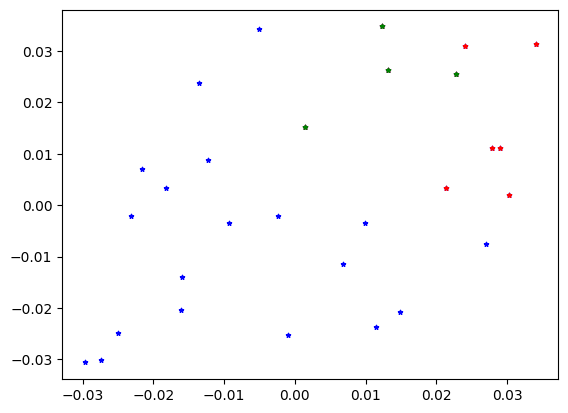

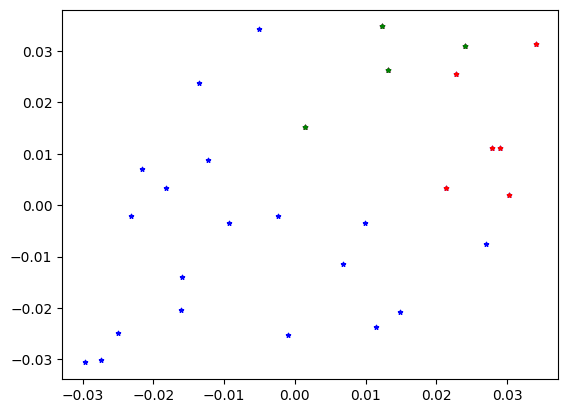

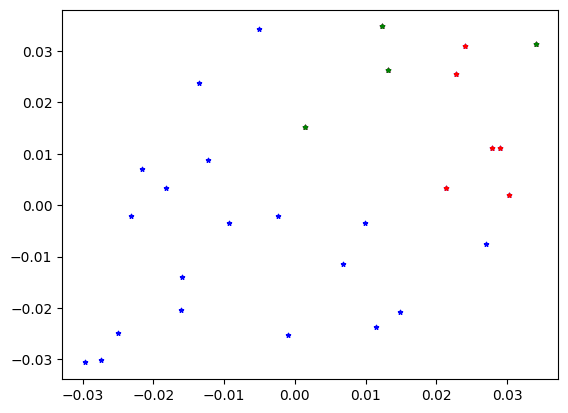

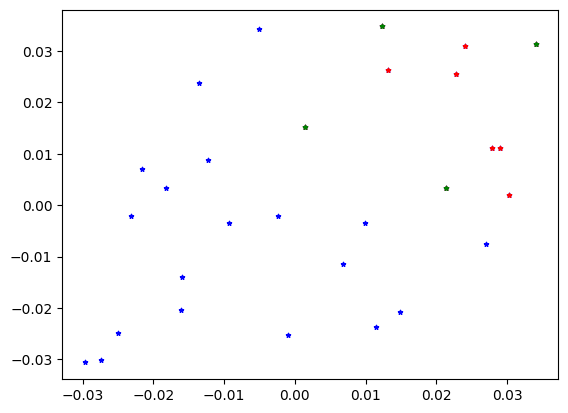

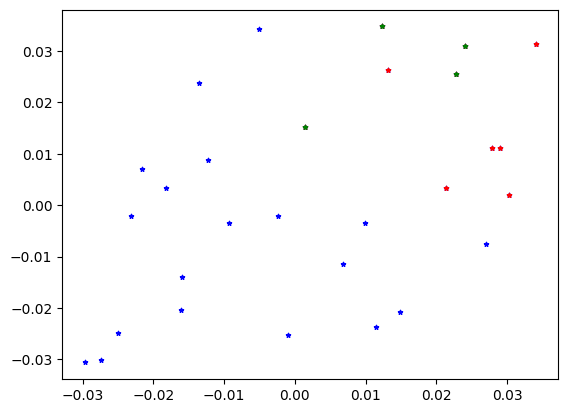

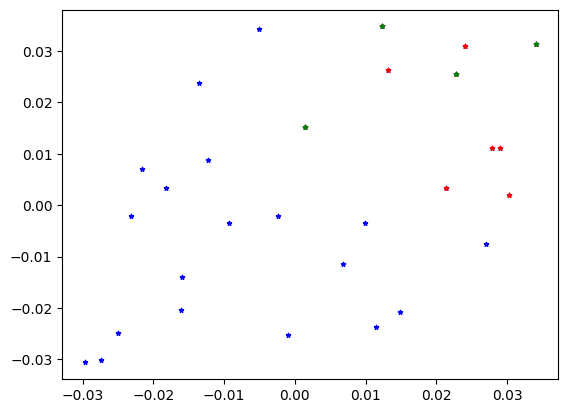

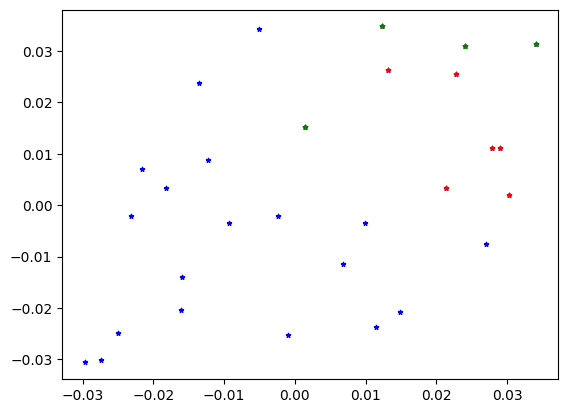

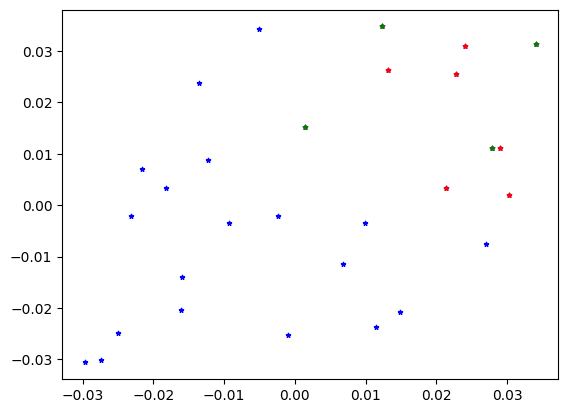

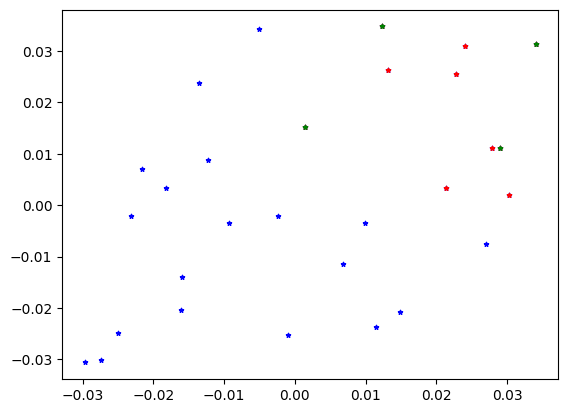

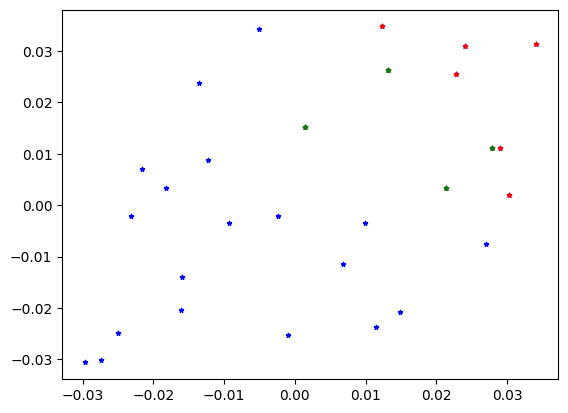

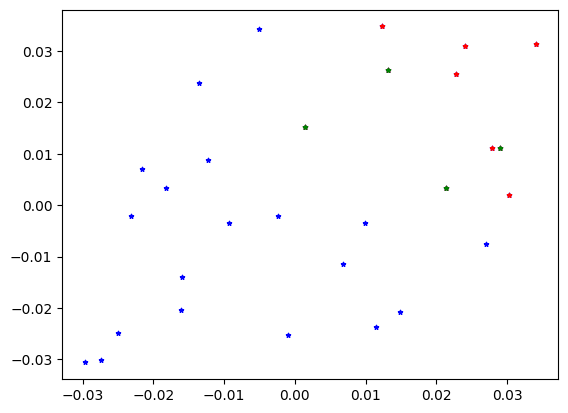

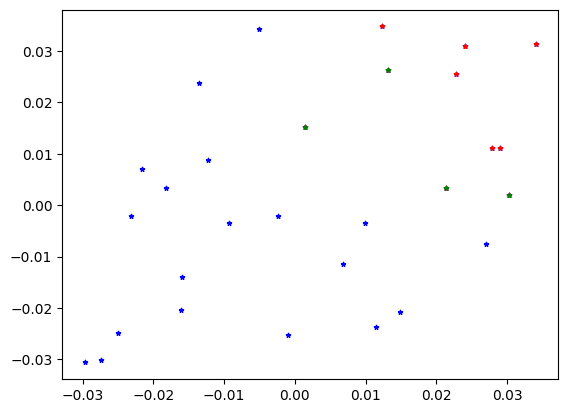

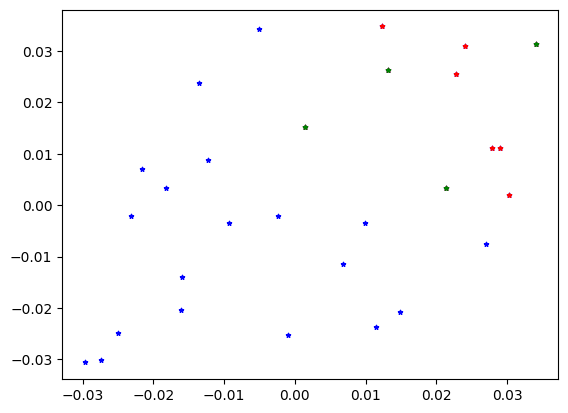

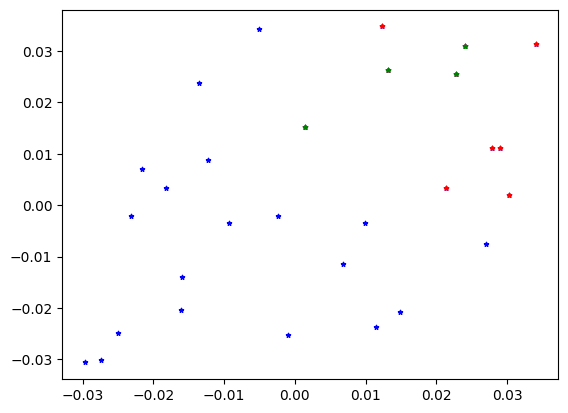

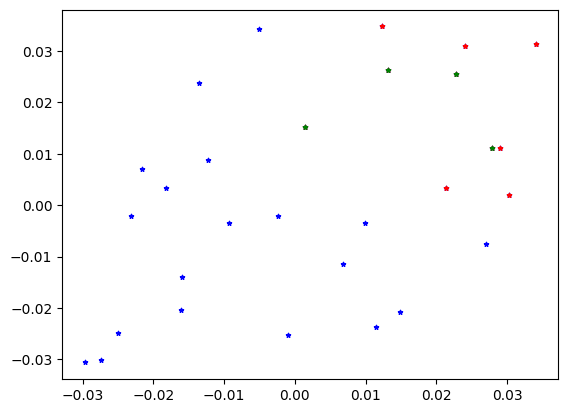

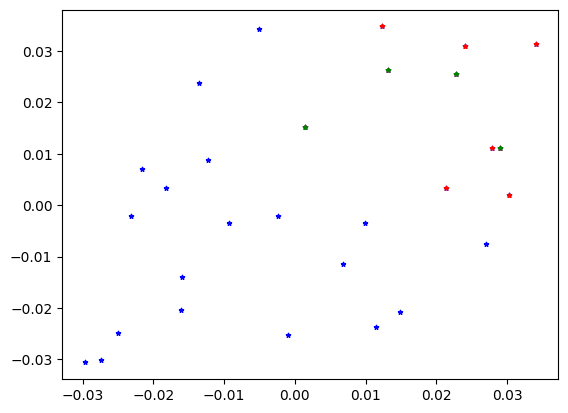

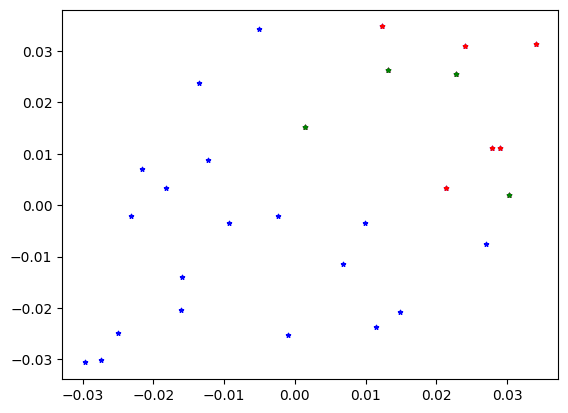

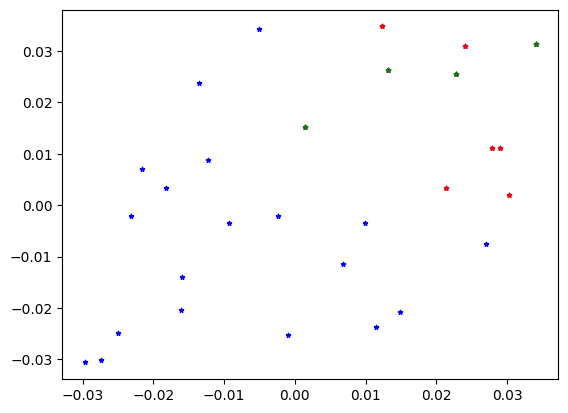

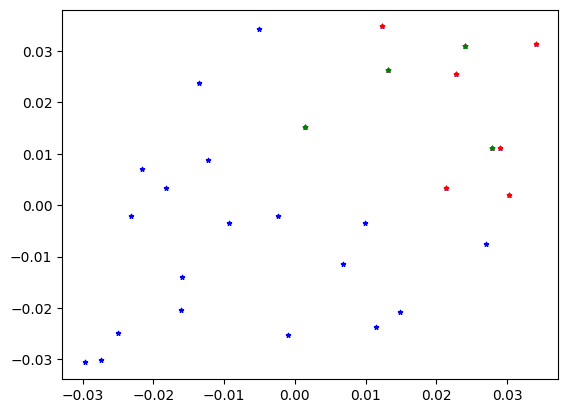

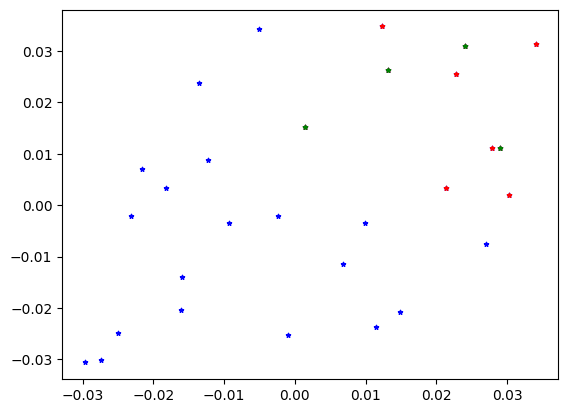

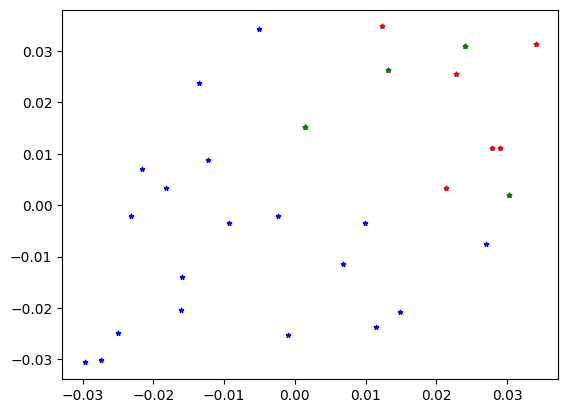

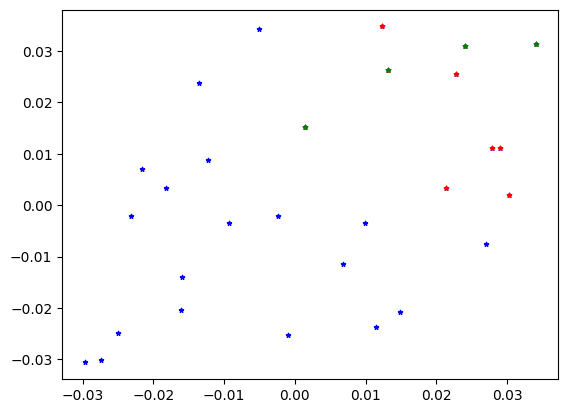

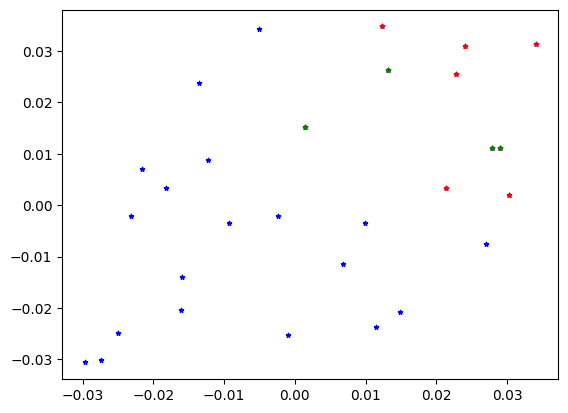

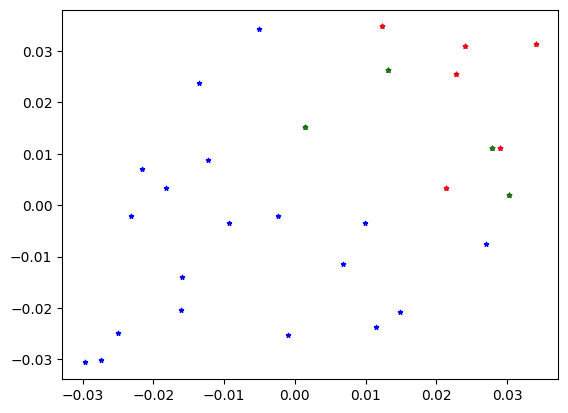

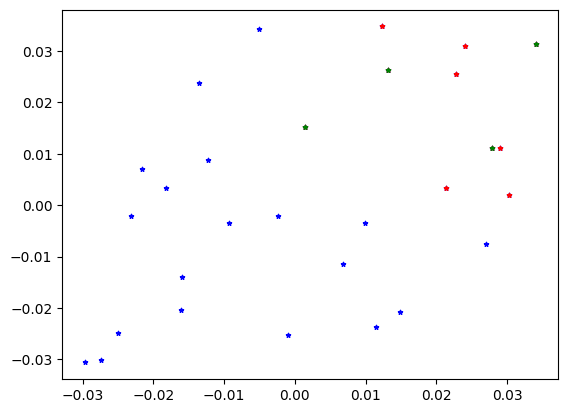

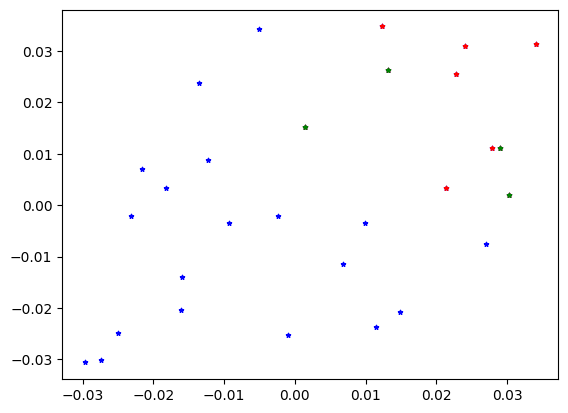

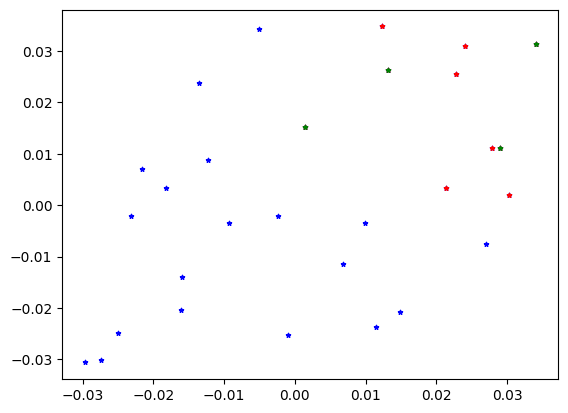

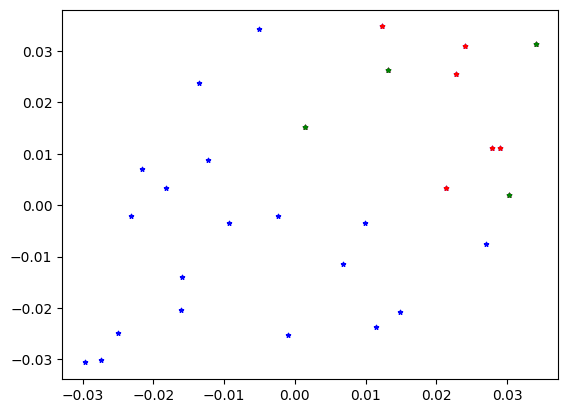

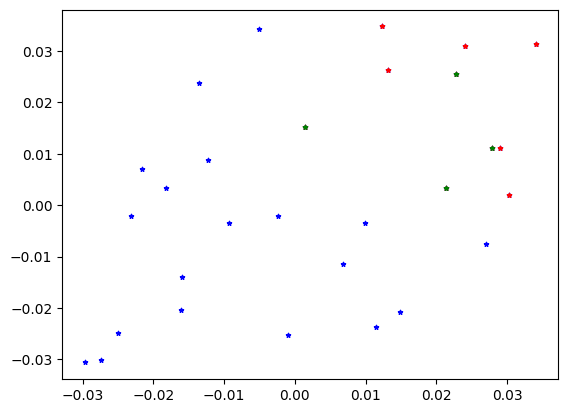

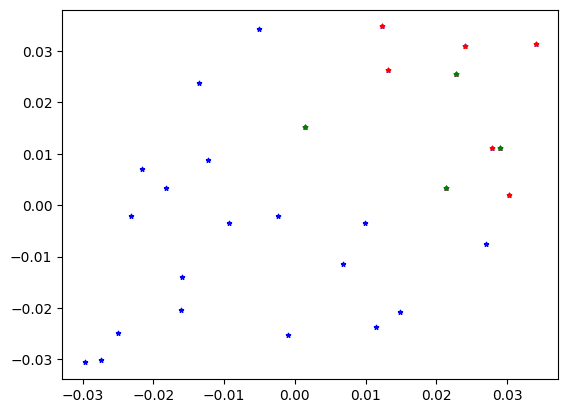

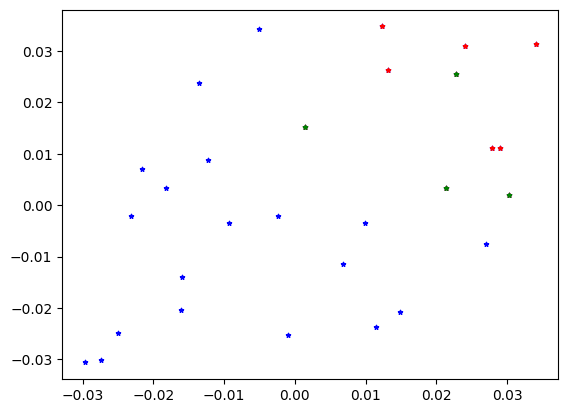

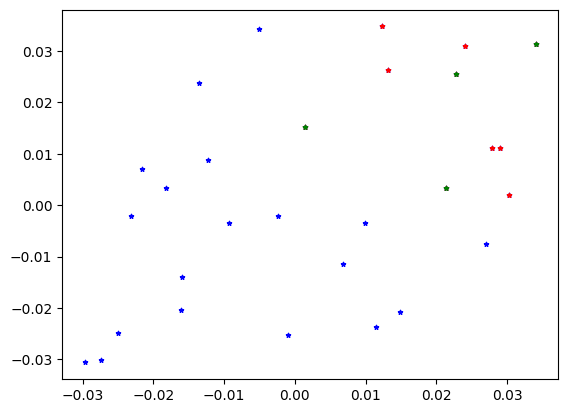

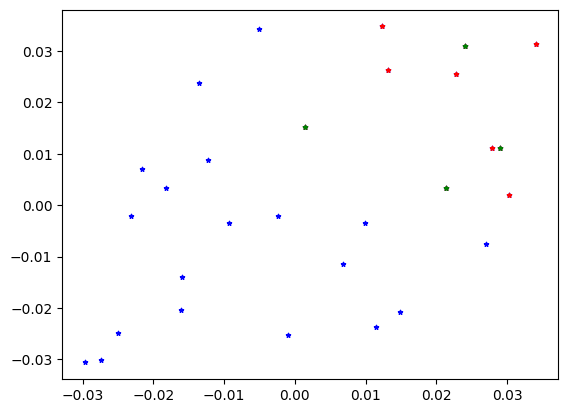

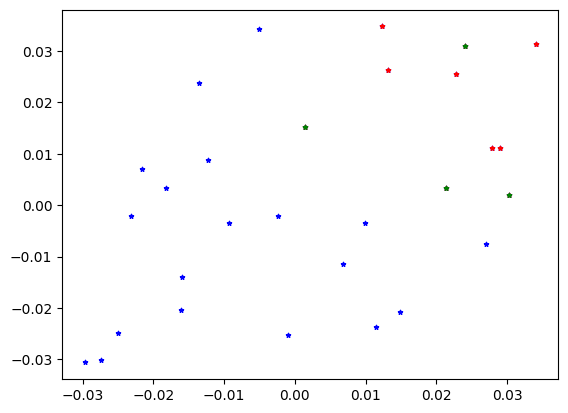

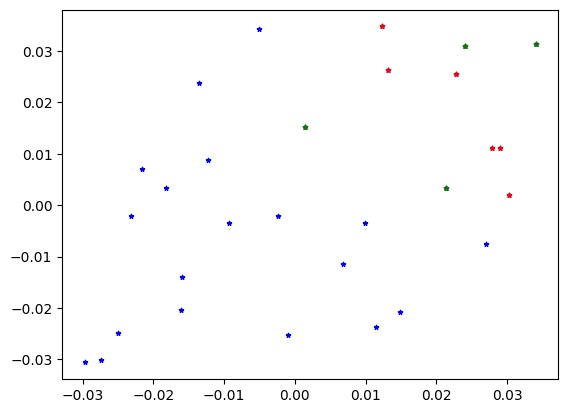

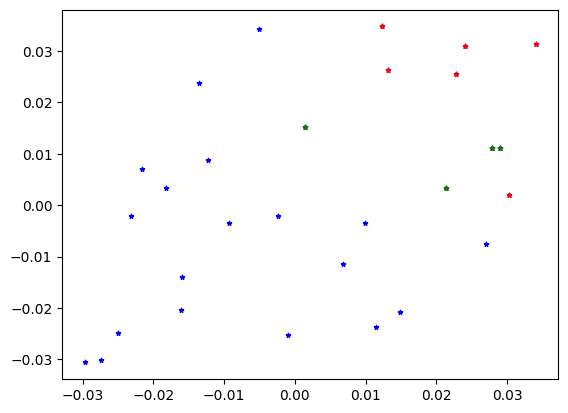

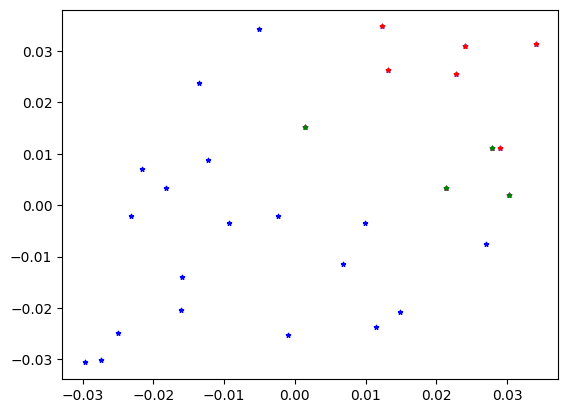

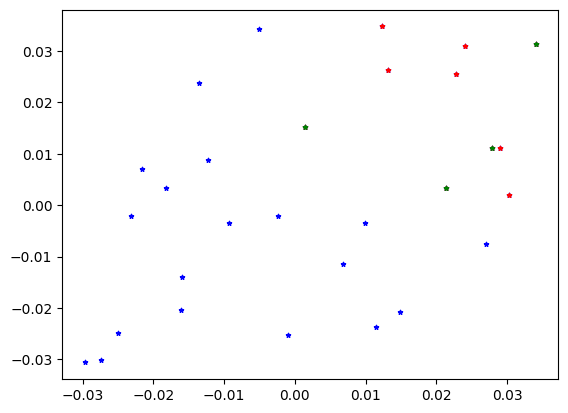

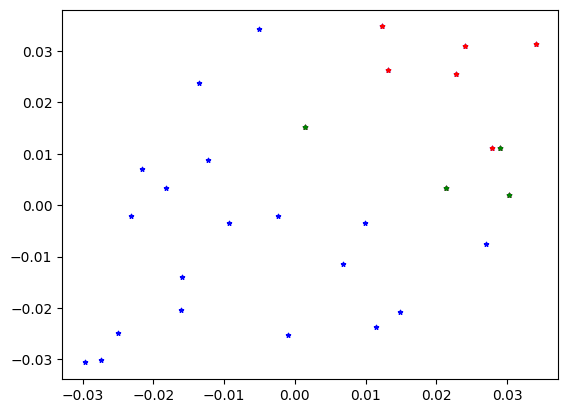

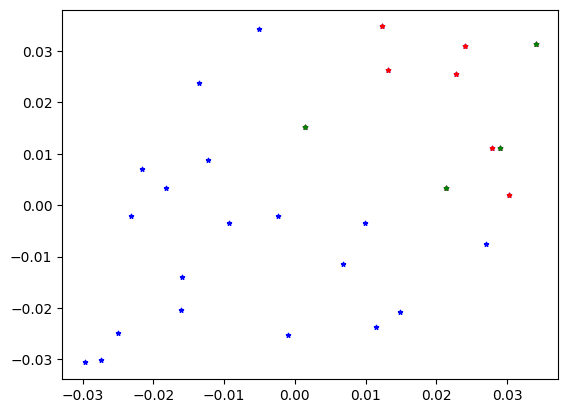

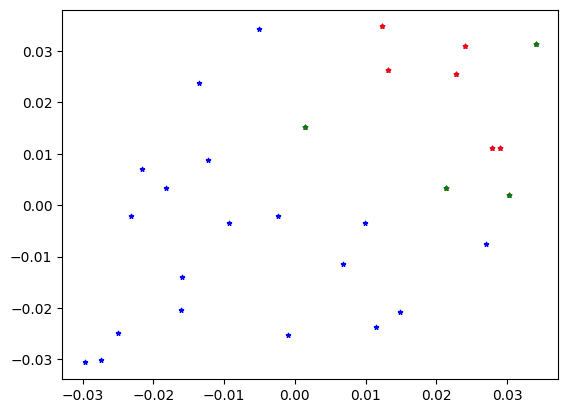

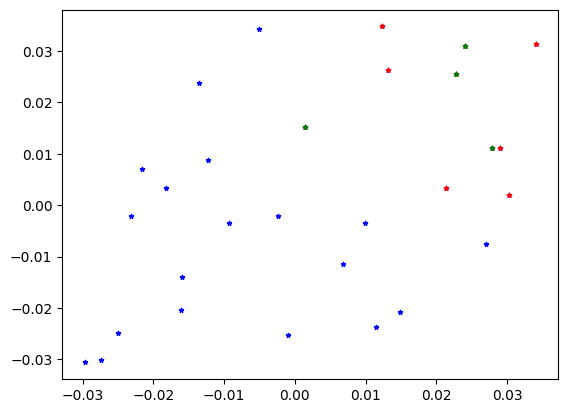

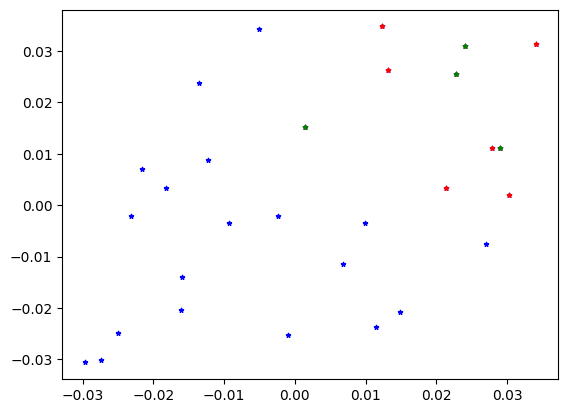

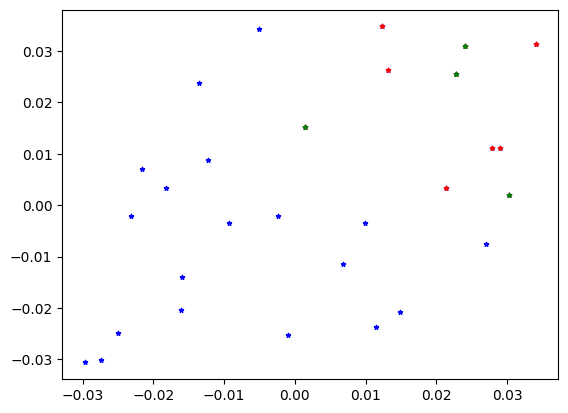

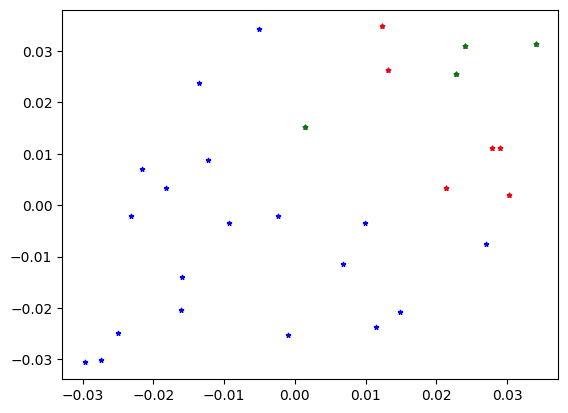

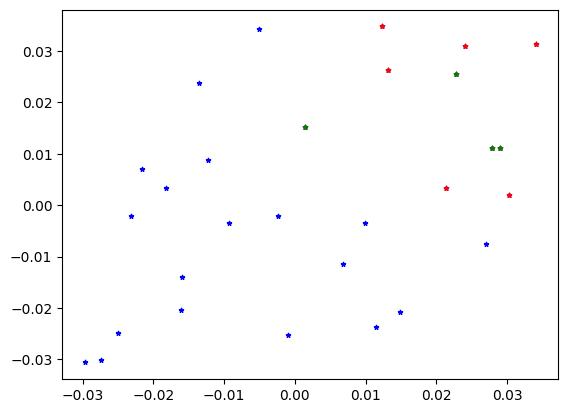

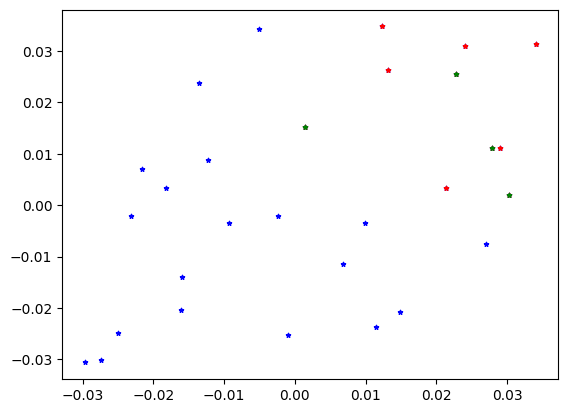

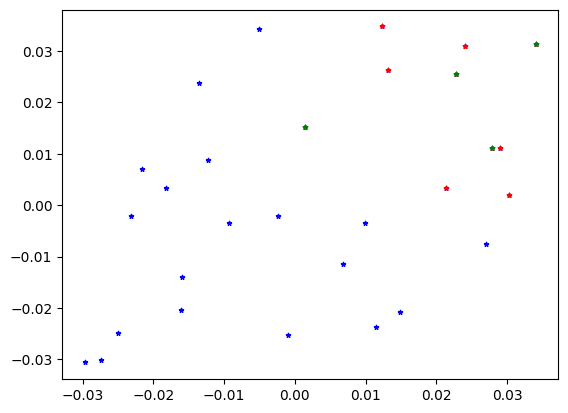

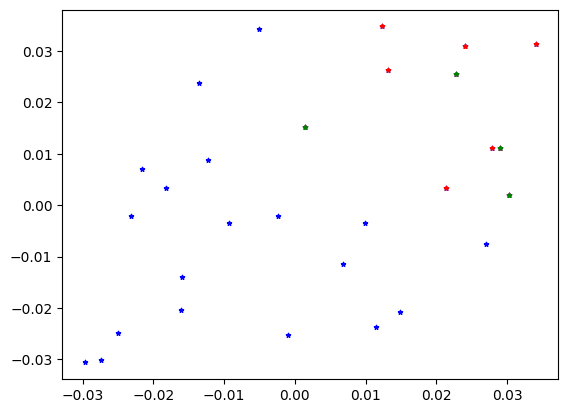

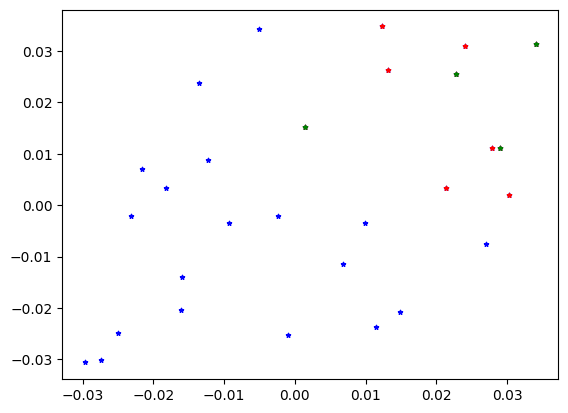

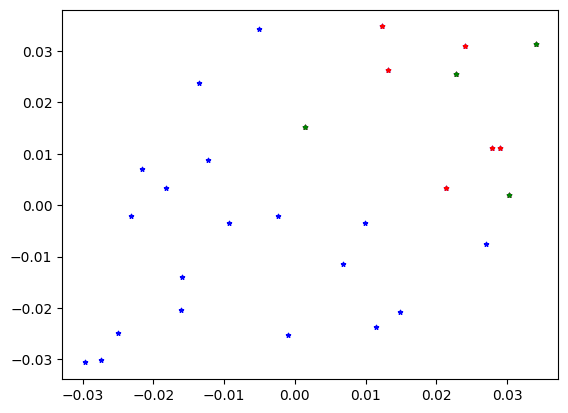

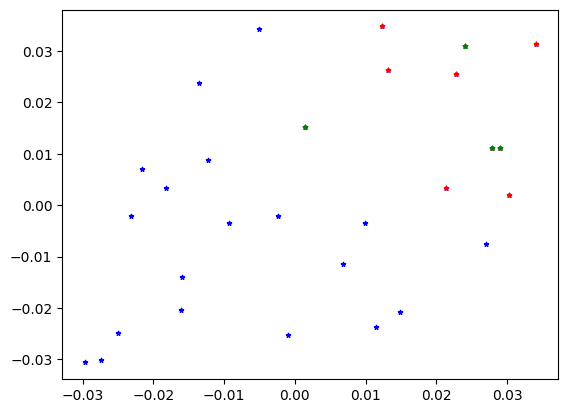

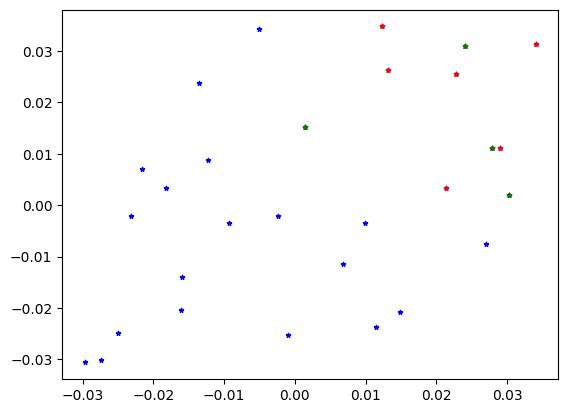

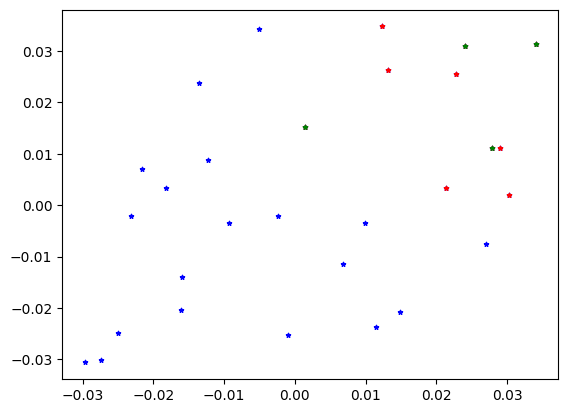

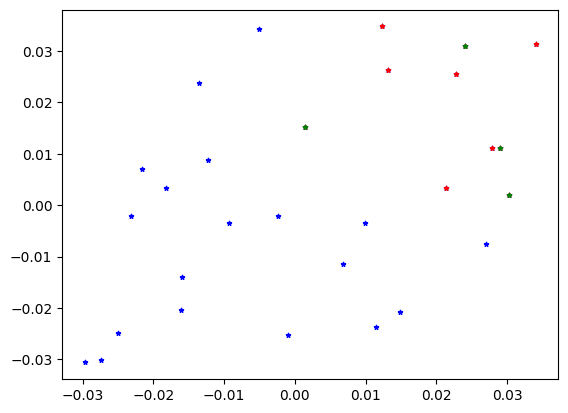

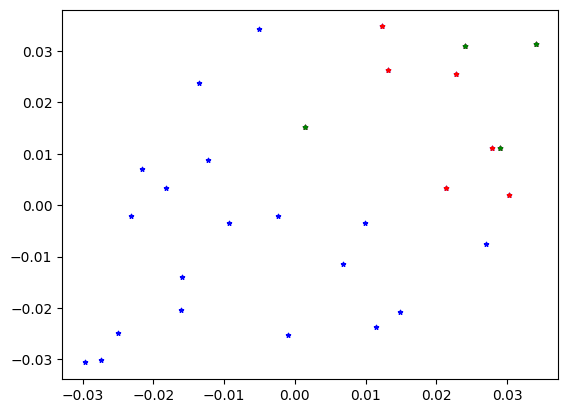

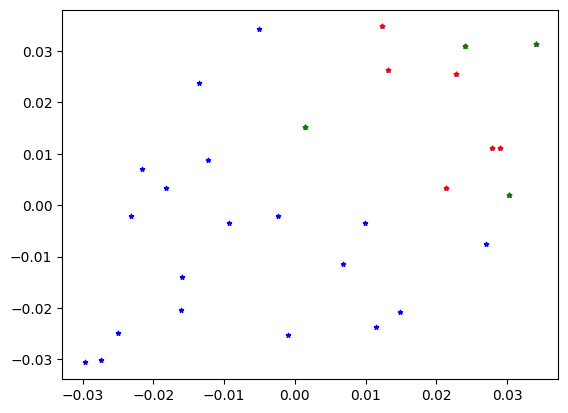

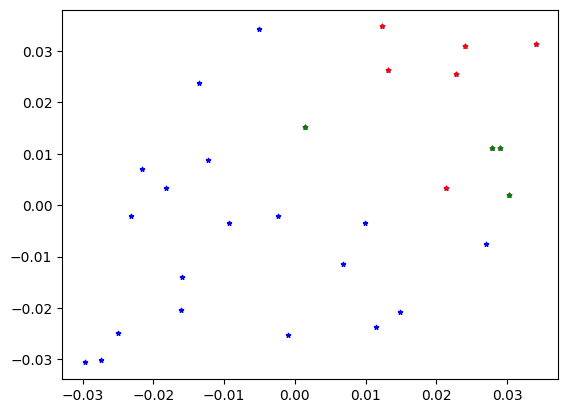

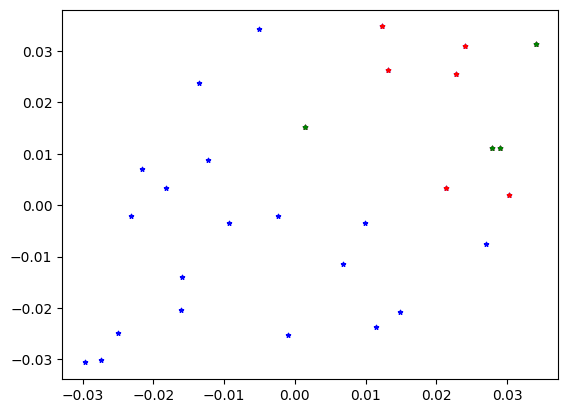

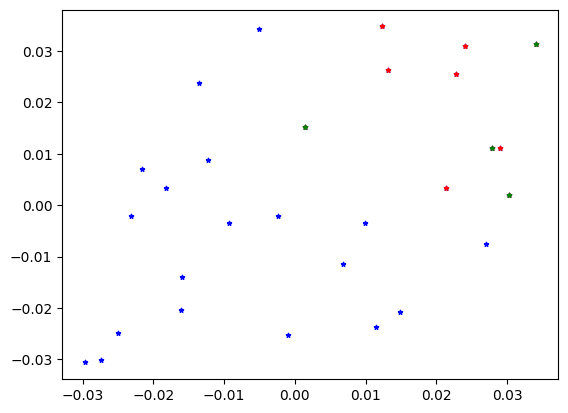

KeyboardInterrupt: ignored

In [ ]:
import time
for i in range(100):
  plt.scatter(stdX, stdY, marker='*', color='blue', s=10)

  plt.scatter(stdX[plotInd], stdY[plotInd], marker='*', color='red', s=10)

  plt.scatter(stdX[quadInd[0+i*4:4+i*4]], stdY[quadInd[0+i*4:4+i*4]], marker='*', color='green', s=10)



  plt.show()
  time.sleep(.1)
  plt.clf()

In [ ]:
a = np.array([1,2,3,455],dtype = 'f')
b = np.array([5,6,7,8],dtype = 'f')

a[0:2] = a[0:2]/b[0:2]

a

array([2.0000000e-01, 3.3333334e-01, 3.0000000e+00, 4.5500000e+02],
      dtype=float32)